In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
#!pip install pretrainedmodels
import sys
import requests
import fastai
import json
import PIL
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.vision.transform import *
import pretrainedmodels
import time
import math
#from fastai_tensorboard_callback import *


In [3]:
np.random.seed(2)
data = ImageDataBunch.from_folder('cat_dog/', train='train', valid='test',
									ds_tfms=get_transforms(flip_vert=True), 
									size=28,num_workers=0, bs=512).normalize(imagenet_stats)

#model_cadene = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')

In [4]:
API_ENDPOINT = "'http:/localhost'"
API_KEY = "XXXXXXXXXXXXXXXXX"
file_paths =  { "classes": 2, "IDs" : []}
leng = len('cat_dog\test\\dog')
for i in data.valid_ds.items:
    file_paths["IDs"].append(str(i)[(leng+2):])
    #if str(i).find("Not")>0:
    #file_paths["IDs"].append(str(i)[(leng+2):])
    #else:
    #file_paths["IDs"].append(str(i)[(leng-1):])
PI = math.pi
PI_2 = PI / 2


In [5]:
file_paths2 =  { "classes": 2, "IDs" : file_paths["IDs"]}
try:
    r = requests.post(url = 'http://10.1.2.182:3000/api/v1/setfastai', json = file_paths2,timeout=0.5) 
    print(r.text)
    r.status_code
except:
    pass

In [6]:
allow_growth = True
def get_cadene_model(pretrained=True, model_name='se_resnet50'):
  if pretrained:
    arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained='imagenet')
  else:
    arch = pretrainedmodels.__dict__[model_name](num_classes=1000, pretrained=None)
  custom_head3 = nn.Sequential(AdaptiveConcatPool2d(), Flatten(), nn.BatchNorm1d(4096), 
                            nn.Linear(in_features=4096, out_features=512), nn.ReLU(),
                            nn.BatchNorm1d(512), nn.Linear(in_features=512, out_features=2),
                            nn.LogSoftmax())
  arch_2 = nn.Sequential(*list(children(arch))[:-2], custom_head3)
  return arch_2
learn3_cadene = cnn_learner(data, partial(get_cadene_model,model_name='se_resnext101_32x4d'),metrics=[accuracy, error_rate], cut=-2)


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


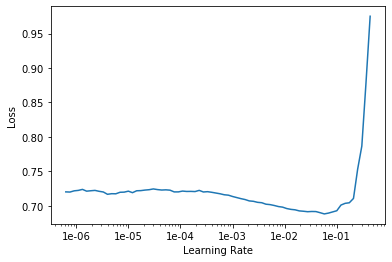

In [12]:
learn3_cadene = learn3_cadene.load('/cat_dog')
learn3_cadene.lr_find()
learn3_cadene.recorder.plot()

In [13]:
#learn3_cadene = learn3_cadene.load('fastai_weights/2fastai_112_black_fine_best')
learn3_cadene = cnn_learner(data, partial(get_cadene_model,model_name='se_resnext101_32x4d'),metrics=[accuracy, error_rate], cut=-2)
for i in range(10):
  if i >= 0 :
      learn3_cadene = learn3_cadene.load('/cat_dog')
  learn3_cadene.fit_one_cycle(1,1e-3,callbacks=[callbacks.SaveModelCallback(learn3_cadene, every='improvement', monitor='accuracy', name='/cat_dog')])
  #time.sleep(10)
  #learn3_cadene.save("/content/drive/My Drive/fastai_448_black{}".format(i))
  json_preds = { "x" : [], "y" : [], "z": []}
  preds,y,losses = learn3_cadene.get_preds(with_loss=True)  
  interp = ClassificationInterpretation(learn3_cadene,preds,y,losses)
  
  preds = preds.tolist()
  losses = losses.tolist()
  #print(y)
  #print(preds)
  maxloss = max(losses)
  k = 0;
  for pred in preds:
      if(pred[1] > pred[0]):
        phi = pred[1]*PI
        theta = (losses[k]/maxloss)*PI
        json_preds["x"].append(math.sin(phi)*math.cos(theta))
        json_preds["y"].append(math.sin(phi)*math.sin(theta))
        json_preds["z"].append(math.cos(phi))
      else:
        phi = pred[0]*PI-PI
        theta= (losses[k]/maxloss)*PI-PI
        json_preds["x"].append(math.sin(phi)*math.cos(theta))
        json_preds["y"].append(math.sin(phi)*math.sin(theta))
        json_preds["z"].append(math.cos(phi))
      k = k+1
  #print(json_preds)
  #sending = json.dumps(json_preds)
  try:
    r = requests.post(url = 'http://10.1.2.182:3000/api/v1/setfastai', json = json_preds,timeout=0.5) 
    print(r.text)
  except:
    pass

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.685019,0.571620,0.750000,0.250000,00:45


Better model found at epoch 0 with accuracy value: 0.75.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.742321,0.564204,0.730000,0.270000,00:45


Better model found at epoch 0 with accuracy value: 0.7300000190734863.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.709592,0.558745,0.750000,0.250000,00:45


Better model found at epoch 0 with accuracy value: 0.75.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.737229,0.552066,0.720000,0.280000,00:45


Better model found at epoch 0 with accuracy value: 0.7200000286102295.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.696604,0.547582,0.750000,0.250000,00:45


Better model found at epoch 0 with accuracy value: 0.75.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.690014,0.551443,0.740000,0.260000,00:45


Better model found at epoch 0 with accuracy value: 0.7400000095367432.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.630281,0.558975,0.750000,0.250000,00:45


Better model found at epoch 0 with accuracy value: 0.75.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.696316,0.569124,0.750000,0.250000,00:45


Better model found at epoch 0 with accuracy value: 0.75.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.728477,0.576799,0.730000,0.270000,00:45


Better model found at epoch 0 with accuracy value: 0.7300000190734863.


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.676334,0.585044,0.710000,0.290000,00:45


Better model found at epoch 0 with accuracy value: 0.7099999785423279.


In [51]:
  learn3_cadene = learn3_cadene.load('fastai_weights/fastai_896_black_87_97')
  json_preds = { "x" : [], "y" : [], "z": []}
  preds,y,losses = learn3_cadene.get_preds(with_loss=True)  
  interp = ClassificationInterpretation(learn3_cadene,preds,y,losses)
  
  preds = preds.tolist()
  losses = losses.tolist()
  print(y)
  maxloss = max(losses)
  k = 0;
  for pred in preds:
      if(pred[1] > pred[0]):
        phi = pred[1]*PI
        theta = (losses[k]/maxloss)*PI
        json_preds["x"].append(math.sin(phi)*math.cos(theta))
        json_preds["y"].append(math.sin(phi)*math.sin(theta))
        json_preds["z"].append(math.cos(phi))
      else:
        phi = pred[0]*PI-PI
        theta= (losses[k]/maxloss)*PI-PI
        json_preds["x"].append(math.sin(phi)*math.cos(theta))
        json_preds["y"].append(math.sin(phi)*math.sin(theta))
        json_preds["z"].append(math.cos(phi))
      k = k+1
  #print(json_preds)
  #sending = json.dumps(json_preds)
  try:
    r = requests.post(url = 'http://10.1.2.182:3000/api/v1/setfastai', json = json_preds,timeout=0.5) 
  except:
    pass

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1])
[[0.9851411581039429, 0.014858782291412354], [0.9689481854438782, 0.03105177730321884], [0.9868242144584656, 0.013175755739212036], [0.8426820039749146, 0.15731801092624664], [0.17272822558879852, 0.8272718191146851], [0.9955529570579529, 0.004447019658982754], [0.9993618130683899, 0.0006382318097166717], [0.9976330995559692, 0.002366913016885519], [0.9998767375946045, 0.00012322019028943032], [0.43352729082107544, 0.5664727091789246], [0.9994515776634216, 0.0005484065623022616], [0.9992801547050476, 0.0007198330713436007], [0.9955670237541199, 0.004432940389961004], [0.8856455683708191, 0.11435441672801971], [0.5556303262710571, 0.44436967372894287],

In [9]:
json_preds2 ={ "x" : json_preds["x"], "y" : json_preds["y"], "z": json_preds["z"]}
try:
    r = requests.post(url = 'http://10.1.2.182:3000/api/v1/setfastai', json = json_preds2,timeout=0.5) 
except:
    pass

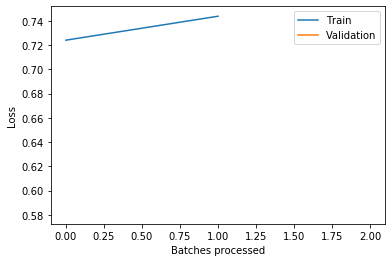

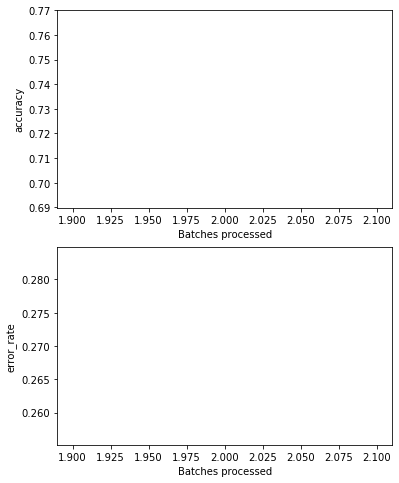

In [10]:
learn3_cadene.recorder.plot_losses()
learn3_cadene.recorder.plot_metrics()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


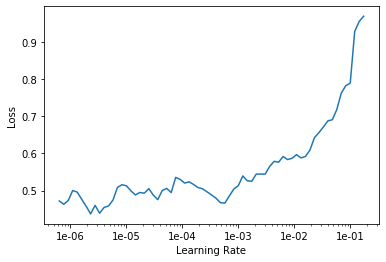

In [8]:
learn3_cadene = learn3_cadene.load('fastai_weights/fastai_448_black_best2')
learn3_cadene.unfreeze()
learn3_cadene.lr_find()
learn3_cadene.recorder.plot()

In [15]:
learn3_cadene = learn3_cadene.load('fastai_weights/fastai_448_black_best2')
learn3_cadene.fit_one_cycle(20,max_lr=slice(1e-9,1e-6),callbacks=[callbacks.SaveModelCallback(learn3_cadene, every='improvement', monitor='accuracy', name='fastai_weights/3fastai_448_black_fine_best')] )
#learn3_cadene.save("fastai_weights/fastai_448_black_fine")

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.454159,0.458566,0.842857,0.157143,01:13
1,0.408500,0.455922,0.828571,0.171429,01:13
2,0.416909,0.505619,0.785714,0.214286,01:14
3,0.436179,0.470864,0.857143,0.142857,01:13
4,0.495796,0.523183,0.814286,0.185714,01:13
5,0.504873,0.456379,0.842857,0.157143,01:13
6,0.399123,0.494941,0.785714,0.214286,01:13
7,0.442701,0.506763,0.800000,0.200000,01:13
8,0.449346,0.441411,0.828571,0.171429,01:13
9,0.431998,0.502928,0.800000,0.200000,01:13


Better model found at epoch 0 with accuracy value: 0.8428571224212646.
Better model found at epoch 3 with accuracy value: 0.8571428656578064.


In [ ]:
learn3_cadene.recorder.plot_losses()
learn3_cadene.recorder.plot_metrics()

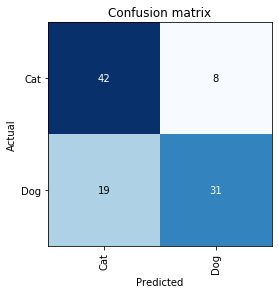

In [11]:
learn3_cadene = learn3_cadene.load('/cat_dog')
interp = ClassificationInterpretation.from_learner(learn3_cadene)
interp.plot_confusion_matrix()
#interp.plot_top_losses(59, figsize=(50,50), heatmap=False)

In [18]:
learn3_cadene = learn3_cadene.load('fastai_polyp/polyp_224_best0')
img = open_image('polyp3.png').resize(112)
learn3_cadene.predict(img)

(Category polyp, tensor(1), tensor([0.2082, 0.7918]))